In [1]:
# Import libraries
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier as DNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Download dataset from github
def download_file(url):
    local_filename = url.split('/')[-1]
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                f.write(chunk)
    return local_filename

file_url = 'https://raw.githubusercontent.com/xinxiewu/datasets/main/pima_indians_diabetes.csv'
df = pd.read_csv(download_file(file_url))
df.describe()

,preg,glucose,bp,skin_thick,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
# Diabetes Group
df.loc[(df['diabetes'] == 1) & (df['glucose'] == 0), 'glucose'] = 140
df.loc[(df['diabetes'] == 1) & (df['bp'] == 0), 'bp'] = 74
df.loc[(df['diabetes'] == 1) & (df['skin_thick'] == 0), 'skin_thick'] = 27
df.loc[(df['diabetes'] == 1) & (df['insulin'] == 0), 'insulin'] = 100
df.loc[(df['diabetes'] == 1) & (df['bmi'] == 0), 'bmi'] = 34.25
df.loc[(df['diabetes'] == 1) & (df['pedigree'] == 0), 'pedigree'] = 0.449
# Non-Diabetes Group
df.loc[(df['diabetes'] == 0) & (df['glucose'] == 0), 'glucose'] = 107
df.loc[(df['diabetes'] == 0) & (df['bp'] == 0), 'bp'] = 70
df.loc[(df['diabetes'] == 0) & (df['skin_thick'] == 0), 'skin_thick'] = 21
df.loc[(df['diabetes'] == 0) & (df['insulin'] == 0), 'insulin'] = 68.792
df.loc[(df['diabetes'] == 0) & (df['bmi'] == 0), 'bmi'] = 30.05
df.loc[(df['diabetes'] == 0) & (df['pedigree'] == 0), 'pedigree'] = 0.336

df.describe()

,preg,glucose,bp,skin_thick,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.378906,27.43099,118.907438,32.433919,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.104431,9.32146,93.570020,6.880664,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.00000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,21.00000,68.792000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,27.00000,100.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.00000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.00000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

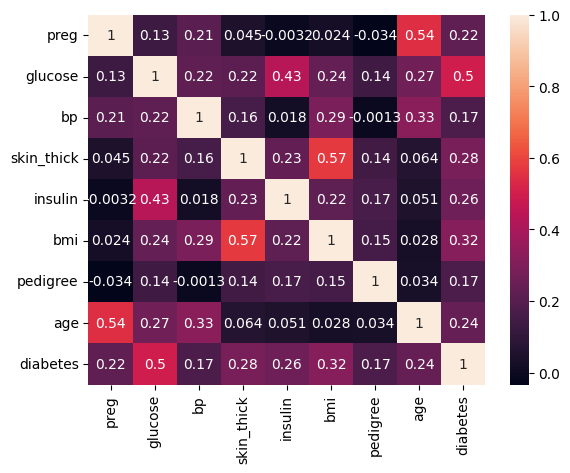

In [4]:
# Correlation
seaborn.heatmap(df.corr(), annot = True)

In [5]:
# Normalization
df.preg = (df.preg - df.preg.mean())/df.preg.std()
df.glucose = (df.glucose - df.glucose.mean())/df.glucose.std()
df.bp = (df.bp - df.bp.mean())/df.bp.std()
df.skin_thick = (df.skin_thick - df.skin_thick.mean())/df.skin_thick.std()
df.insulin = (df.insulin - df.insulin.mean())/df.insulin.std()
df.bmi = (df.bmi - df.bmi.mean())/df.bmi.std()
df.pedigree = (df.pedigree - df.pedigree.mean())/df.pedigree.std()
df.age = (df.age - df.age.mean())/df.age.std()
df.describe()

,preg,glucose,bp,skin_thick,insulin,bmi,pedigree,age,diabetes
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000
mean,-7.864080e-17,1.757853e-16,-1.734723e-17,1.260566e-16,-2.312965e-17,-3.608225e-16,2.451743e-16,2.035409e-16,0.348958
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.476951
min,-1.141108e+00,-2.549786e+00,-3.996793e+00,-2.191823e+00,-1.121165e+00,-2.068684e+00,-1.188778e+00,-1.040871e+00,0.000000
25%,-8.443348e-01,-7.197665e-01,-6.922181e-01,-6.899122e-01,-5.355929e-01,-7.170702e-01,-6.885198e-01,-7.857741e-01,0.000000
50%,-2.507887e-01,-1.535274e-01,-3.130310e-02,-4.623627e-02,-2.020673e-01,-5.579683e-02,-2.999328e-01,-3.606124e-01,0.000000
75%,6.395305e-01,6.096645e-01,6.296119e-01,4.901604e-01,8.915850e-02,6.054765e-01,4.659233e-01,6.597757e-01,1.000000
max,3.904034e+00,2.538160e+00,4.099415e+00,7.677875e+00,7.770572e+00,5.038188e+00,5.879733e+00,4.061069e+00,1.000000


In [6]:
# 7:3 Data Split
x = df.iloc[:, 0:8]
y = df.iloc[:, 8:9]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [7]:
# Baseline - Logistic Regression
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
conf_m = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Confusion Matrix: \n {conf_m} \n")
print(f"Classification Report: \n {report}")

Confusion Matrix: 
 [[123  28]
 [ 31  49]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.64      0.61      0.62        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.74      0.74       231



c:\Users\wxx19\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
# Baseline - SVM
clf = svm.SVC()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
conf_m = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Confusion Matrix: \n {conf_m} \n")
print(f"Classification Report: \n {report}")

Confusion Matrix: 
 [[126  25]
 [ 29  51]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       151
           1       0.67      0.64      0.65        80

    accuracy                           0.77       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.77      0.76       231



c:\Users\wxx19\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
# Baseline - NB
GNBclf = GaussianNB()
GNBclf.fit(x_train, y_train)
y_pred = GNBclf.predict(x_test)
conf_m = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Confusion Matrix: \n {conf_m} \n")
print(f"Classification Report: \n {report}")

Confusion Matrix: 
 [[119  32]
 [ 29  51]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.61      0.64      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



c:\Users\wxx19\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Unsupervised Learning - PCA + K-means

In [46]:
# PCA - Dimension Reduction: L < P
# Standardization helps PCA
def pca_choice():
    total_accuracy = 0
    pca_best_components = 0
    for i in range(x.shape[1]):
        # PCA
        pca = PCA(n_components=(i+1))
        pca.fit(x)
        x_train_pca = pca.transform(x_train)
        x_test_pca = pca.transform(x_test)
        # Improved Logistic Regression
        clf = LogisticRegression()
        clf.fit(x_train_pca, y_train)
        y_pred = clf.predict(x_test_pca)
        conf_m = confusion_matrix(y_test, y_pred)
        if (conf_m[0][0] + conf_m[1][1]) / y_test.shape[0] > total_accuracy:
            total_accuracy = (conf_m[0][0] + conf_m[1][1]) / y_test.shape[0]
            pca_best_components = (i+1)
    return pca_best_components

pca_n = pca_choice()

# PCA
pca = PCA(n_components=pca_n)
pca.fit(x)
x_pca = pca.transform(x)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
# Improved Logistic Regression
clf = LogisticRegression()
clf.fit(x_train_pca, y_train)
y_pred = clf.predict(x_test_pca)
conf_m = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"PCA Component N: \n {pca_n} \n")
print(f"Confusion Matrix: \n {conf_m} \n")
print(f"Classification Report: \n {report}")

PCA Component N: 
 6 

Confusion Matrix: 
 [[125  26]
 [ 32  48]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.83      0.81       151
           1       0.65      0.60      0.62        80

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



c:\Users\wxx19\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\wxx19\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\wxx19\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\wxx19\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataC

In [232]:
# K-means
km = KMeans(n_clusters=2)
km.fit(x_pca)
y_km = km.predict(x_pca)
incorrect = []
correct = 0
x_new = []
y_new = []
for i in range(len(y)):
    if y_km[i] == 1 - y.iloc[i][0]:
        x_new.append(x_pca[i])
        y_new.append(y.iloc[i][0])
        correct += 1
    else:
        incorrect.append(i)
x_new = np.asarray(x_new)
y_new = np.asarray(y_new)
correct / len(y)

c:\Users\wxx19\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.73046875

In [233]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.3, random_state = 42)
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
conf_m = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Confusion Matrix: \n {conf_m} \n")
print(f"Classification Report: \n {report}")

Confusion Matrix: 
 [[112   0]
 [  2  55]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       112
           1       1.00      0.96      0.98        57

    accuracy                           0.99       169
   macro avg       0.99      0.98      0.99       169
weighted avg       0.99      0.99      0.99       169



In [274]:
# Random Forest
total_accuracy_max = 0
positive_accuracy_max = 0
negative_accuracy_max = 0
for i in range(10000):
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    conf_m = confusion_matrix(y_test, y_pred)
    if (conf_m[0][0]+conf_m[1][1])/y_test.shape[0] > total_accuracy_max:
        total_accuracy_max = (conf_m[0][0]+conf_m[1][1])/y_test.shape[0]
        positive_accuracy_max = (conf_m[1][1])/(conf_m[0][1]+conf_m[1][1])
        negative_accuracy_max = (conf_m[0][0])/(conf_m[0][0]+conf_m[1][0])

print(f"Total Accuracy: {total_accuracy_max} \n")
print(f"Positive Accuracy: {positive_accuracy_max} \n")
print(f"Negative Accuracy: {negative_accuracy_max} \n")

C:\Users\wxx19\AppData\Local\Temp\ipykernel_23448\3092775648.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)
C:\Users\wxx19\AppData\Local\Temp\ipykernel_23448\3092775648.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)
C:\Users\wxx19\AppData\Local\Temp\ipykernel_23448\3092775648.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)
C:\Users\wxx19\AppData\Local\Temp\ipykernel_23448\3092775648.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)
C:\U

Total Accuracy: 0.8917748917748918 

Positive Accuracy: 0.8395061728395061 

Negative Accuracy: 0.92 



In [247]:
# Neural Network - MLP
score = []
for i in range(100):
    dnn = DNN(hidden_layer_sizes=(int(i+1)), random_state=420)
    dnn = dnn.fit(x_train, y_train)
    score.append(dnn.score(x_test,y_test))

c:\Users\wxx19\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\wxx19\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\wxx19\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\wxx19\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

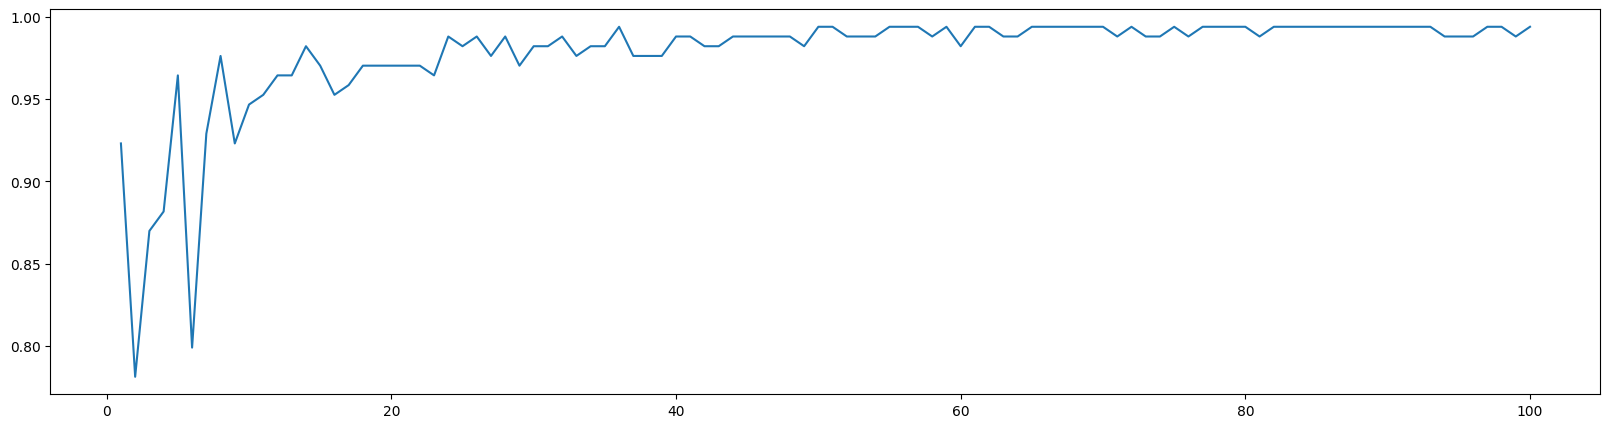

In [246]:
plt.figure(figsize=(20,5))
plt.plot(range(1,101),score)
plt.show()

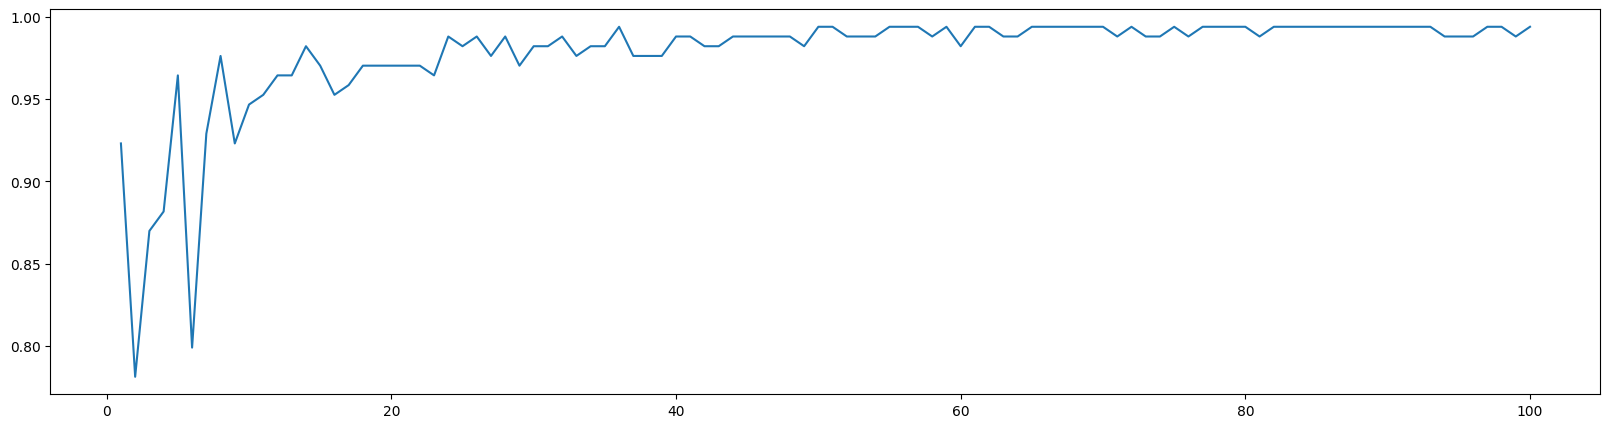

In [248]:
plt.figure(figsize=(20,5))
plt.plot(range(1,101),score)
plt.show()

In [24]:
from torch.utils.data import DataLoader, TensorDataset

trainloader = DataLoader(TensorDataset(x_train, y_train), batch_size=256, shuffle=True)
trainloader = DataLoader(TensorDataset(x_test, y_test), batch_size=256, shuffle=True)

In [23]:
import torch
x_train = torch.from_numpy(np.array(x_train))
y_train = torch.from_numpy(np.array(y_train))
x_test = torch.from_numpy(np.array(x_test))
y_test = torch.from_numpy(np.array(y_test))

In [20]:
# Neural Network - CNN
from torch.utils.data import DataLoader, TensorDataset

trainloader = DataLoader(TensorDataset(x_train, y_train), batch_size=256, shuffle=True)

import torch.nn as nn
import torch.nn.functional as F
import torch

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(x_train, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = x_train, y_train

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

RuntimeError: Input type (double) and bias type (float) should be the same

In [32]:
import torch
from torch import nn

class LeNet5(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, padding=2)
        self.pool1 = nn.MaxPool2d((2, 2))
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool2 = nn.MaxPool2d((2, 2))
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(len(x), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [33]:

import torch.optim as optim

model = LeNet5()
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

for epoch in range(10):
    for i in range(x_train.shape[0]):
        X = x_train[i]
        y = y_train[i]
    # X, y in x_train, y_train:
        pred = model(X)
        loss = criterion(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    with torch.no_grad():
        y_pred = model(x_train)
        acc_train = (y_pred.argmax(dim=1) == y_train).float().mean().item()
        y_pred = model(x_test)
        acc_test = (y_pred.argmax(dim=1) == y_test).float().mean().item()
        print(epoch, acc_train, acc_test)

RuntimeError: Input type (double) and bias type (float) should be the same

In [30]:
x_train[0]

tensor([-0.8443, -0.8757, -1.0227, -1.0118, -0.6509, -1.2403, -0.6395, -0.9558],
       dtype=torch.float64)